In [5]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field

In [ ]:
from typing import Literal 
class SentimentArticle(BaseModel):
    sentiment: Literal['긍정', '부정', '중립'] = Field(description="감성분석 분류")
    score: float = Field(description='감성분석 점수')

In [8]:
model = ChatOpenAI(
    model='gpt-4.1',
    temperature=0
)

In [9]:
parser = PydanticOutputParser(pydantic_object=SentimentArticle)

In [10]:
prompt_template = """ 
당신은 뉴스 기사의 감성을 분석하는 AI입니다. 
아래 뉴스를 읽고 감성을 '긍정', '부정', '중립' 중 하나로 분류하고, 감성 점수를 json 형식으로 출력하세요.

{format_instructions}

뉴스 기사:
{news_article}
"""

In [12]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"sentiment": {"description": "감성분석 분류", "enum": ["긍정", "부정", "중립"], "title": "Sentiment", "type": "string"}, "score": {"description": "감성분석 점수", "title": "Score", "type": "number"}}, "required": ["sentiment", "score"]}
```


In [13]:
prompt = PromptTemplate(
    template=prompt_template, 
    input_variables=['news_article'],
    partial_variables={"format_instructions" : parser.get_format_instructions()}

)

In [14]:
chain = prompt | model | parser

In [15]:
text = """


삼성전자가 글로벌 빅테크 기업과 23조 원 규모의 반도체 위탁생산(파운드리) 공급 계약에 성공한 것은 최선단 반도체 공정인 2나노(㎚·10억 분의 1m) 분야 기술력과 양산 안정화에 집중한 결과로 풀이된다. 나노는 반도체 회로의 선폭을 뜻한다. 선폭 공정이 미세화할수록 전력 소비가 줄고 데이터 처리 속도는 올라가 인공지능(AI) 반도체 시대를 맞아 중요성은 더욱 커지고 있다.

반도체 업계에서는 이번 삼성전자의 파운드리 수주가 업계 1위인 대만 TSMC의 독주를 견제하고, 구형 공정에서는 중국 SMIC 등 후발 주자들의 기술 추격을 뿌리칠 수 있는 고무적인 성과라는 평가가 나온다.

28일 반도체 업계에 따르면 이번에 삼성전자가 수주한 파운드리 물량은 미국 텍사스주 테일러시에 짓고 있는 파운드리 공장의 첨단 2나노 공정을 통해 내년부터 양산할 계획인 것으로 알려졌다. 삼성전자는 그간 파운드리 기술력과 고객사 확보에 집중한다는 목표하에 ‘내실 다지기’에 주력해 왔다. 경영상 비밀 유지에 따라 고객사는 비공개지만, 업계에선 이번 고객사가 미국 주요 빅테크 기업 중 하나로 추정하고 있다. 시장에서는 테슬라가 옵티머스 휴머노이드 로봇과 자율주행차에 모두 2나노급 최신 AI 칩을 쓸 것으로 관측한다. 엔비디아, 구글, 아마존 등도 최신 파운드리 공정을 활용해 자율주행용 AI 칩 등을 설계한다. 이에 대해 삼성전자는 “고객사와 관련한 내용은 밝힐 수 없다”고 전했다.

이번 공급계약으로 테일러시에 짓고 있는 파운드리 공장도 조만간 본격 가동에 돌입할 것으로 예상된다. 지난 2022년부터 170억 달러(약 23조4800억 원)를 들여 건설 중인 테일러 공장은 사실상 완공된 상태이지만, 주요 고객사 계약이 없어 실제 가동은 무기한 연기될 것이란 전망이 지배적이었다. 업계 관계자는 “이번 수주로 테일러 공장이 돌아갈 수 있는 계기를 마련했다는 것만으로 큰 의미가 있다”며 “한동안 속도 조절에 들어갔던 경기 평택 P4(4라인)·P5(5라인) 파운드리 공사에도 다시 속도를 낼 것으로 예상된다”고 말했다.

대만 TSMC에 빼앗긴 글로벌 파운드리 시장 점유율도 되찾을지 주목된다. 시장조사기관 트렌드포스에 따르면 올해 1분기 삼성 파운드리의 점유율은 7.7%로 대만 TSMC(67.6%)와 60%포인트 가까이 벌어져 있다. 3위인 중국 SMIC(6%)와의 격차는 빠르게 좁혀지고 있다. 초거대 AI 모델 가동에 필수적인 그래픽처리장치(GPU)·앱프로세서(AP)·중앙처리장치(CPU) 등 파운드리 물량이 늘어나는 만큼, 삼성전자가 추가 고객사 확보에 성공하면 TSMC의 독주 체제에도 균열을 낼 수 있을 전망이다. 메모리 반도체 부진으로 하락하고 있는 반도체(DS) 부문 실적에도 숨통이 트일 것으로 보인다. 시장에서는 지난 2분기 삼성전자 반도체 부문의 영업이익이 1조 원을 밑돌 것으로 예상했다."""

In [16]:
rt = chain.invoke({'news_article' : text})

In [23]:
print(rt.model_dump_json(indent=2))

{
  "sentiment": "긍정",
  "score": 0.85
}


In [25]:
import json 

json.loads(rt.model_dump_json())

{'sentiment': '긍정', 'score': 0.85}

pip install  langchain_ollama

In [29]:
from langchain_ollama import ChatOllama

In [30]:
llm = ChatOllama(
    model='llama3:latest',
    format='json',
    temperature=0
)

In [34]:
resp = llm.invoke("서울에서 가볼 만한 곳 5곳을 한글로 알려주세요. key: `places`. response in JSON format")

In [35]:
print(resp.content)

{"places": [
  {"name": "Gyeongbokgung Palace", "description": " Korea's largest and most iconic palace, built in 1395."},
  {"name": "Namsan Tower (Seoul Tower)", "description": "A iconic tower with great views of the city, especially during sunset."},
  {"name": "Myeong-dong Shopping District", "description": "One of Seoul's busiest and most popular shopping districts, filled with fashion stores, street food, and more."},
  {"name": "Bukchon Hanok Village", "description": "A traditional Korean village with hundreds of hanok houses, offering a glimpse into the past."},
  {"name": "Hongdae Night Market", "description": "A bustling night market in the trendy Hongdae neighborhood, featuring street food, drinks, and live music."}
] }


In [8]:
import base64 
from io import BytesIO

from IPython.display import HTML, display

In [9]:
def convert_to_base64(pil_image):
    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

In [17]:
def convert_to_base64(pil_image):
    """
    PIL 이미지를 Base64로 인코딩된 문자열로 변환합니다.

    :param pil_image: PIL 이미지
    :return: 크기 조정된 Base64 문자열
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # 필요한 경우 형식을 변경할 수 있습니다.
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str

In [28]:
from langchain_core.messages import HumanMessage

def prompt_func(data):  # 프롬프트 함수를 정의합니다.
    text = data["text"]  # 데이터에서 텍스트를 가져옵니다.
    image = data["image"]  # 데이터에서 이미지를 가져옵니다.

    image_part = {  # 이미지 부분을 정의합니다.
        "type": "image_url",  # 이미지 URL 타입을 지정합니다.
        "image_url": f"data:image/jpeg;base64,{image}",  # 이미지 URL을 생성합니다.
    }

    content_parts = []  # 콘텐츠 부분을 저장할 리스트를 초기화합니다.

    text_part = {"type": "text", "text": text}  # 텍스트 부분을 정의합니다.

    content_parts.append(image_part)  # 이미지 부분을 콘텐츠 부분에 추가합니다.
    content_parts.append(text_part)  # 텍스트 부분을 콘텐츠 부분에 추가합니다.

    return [HumanMessage(content=content_parts)]  # HumanMessage 객체를 반환합니다.

In [29]:
file_path = "./data/Lei Hawaii Waikiki Beach.jpg"

In [30]:
from PIL import Image
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image )

In [31]:
def plt_img_base64(img_base64):
    """
    Base64로 인코딩된 문자열을 이미지로 표시합니다.

    :param img_base64:  Base64 문자열
    """
    # Base64 문자열을 소스로 사용하여 HTML img 태그 생성
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # HTML을 렌더링하여 이미지 표시
    display(HTML(image_html))


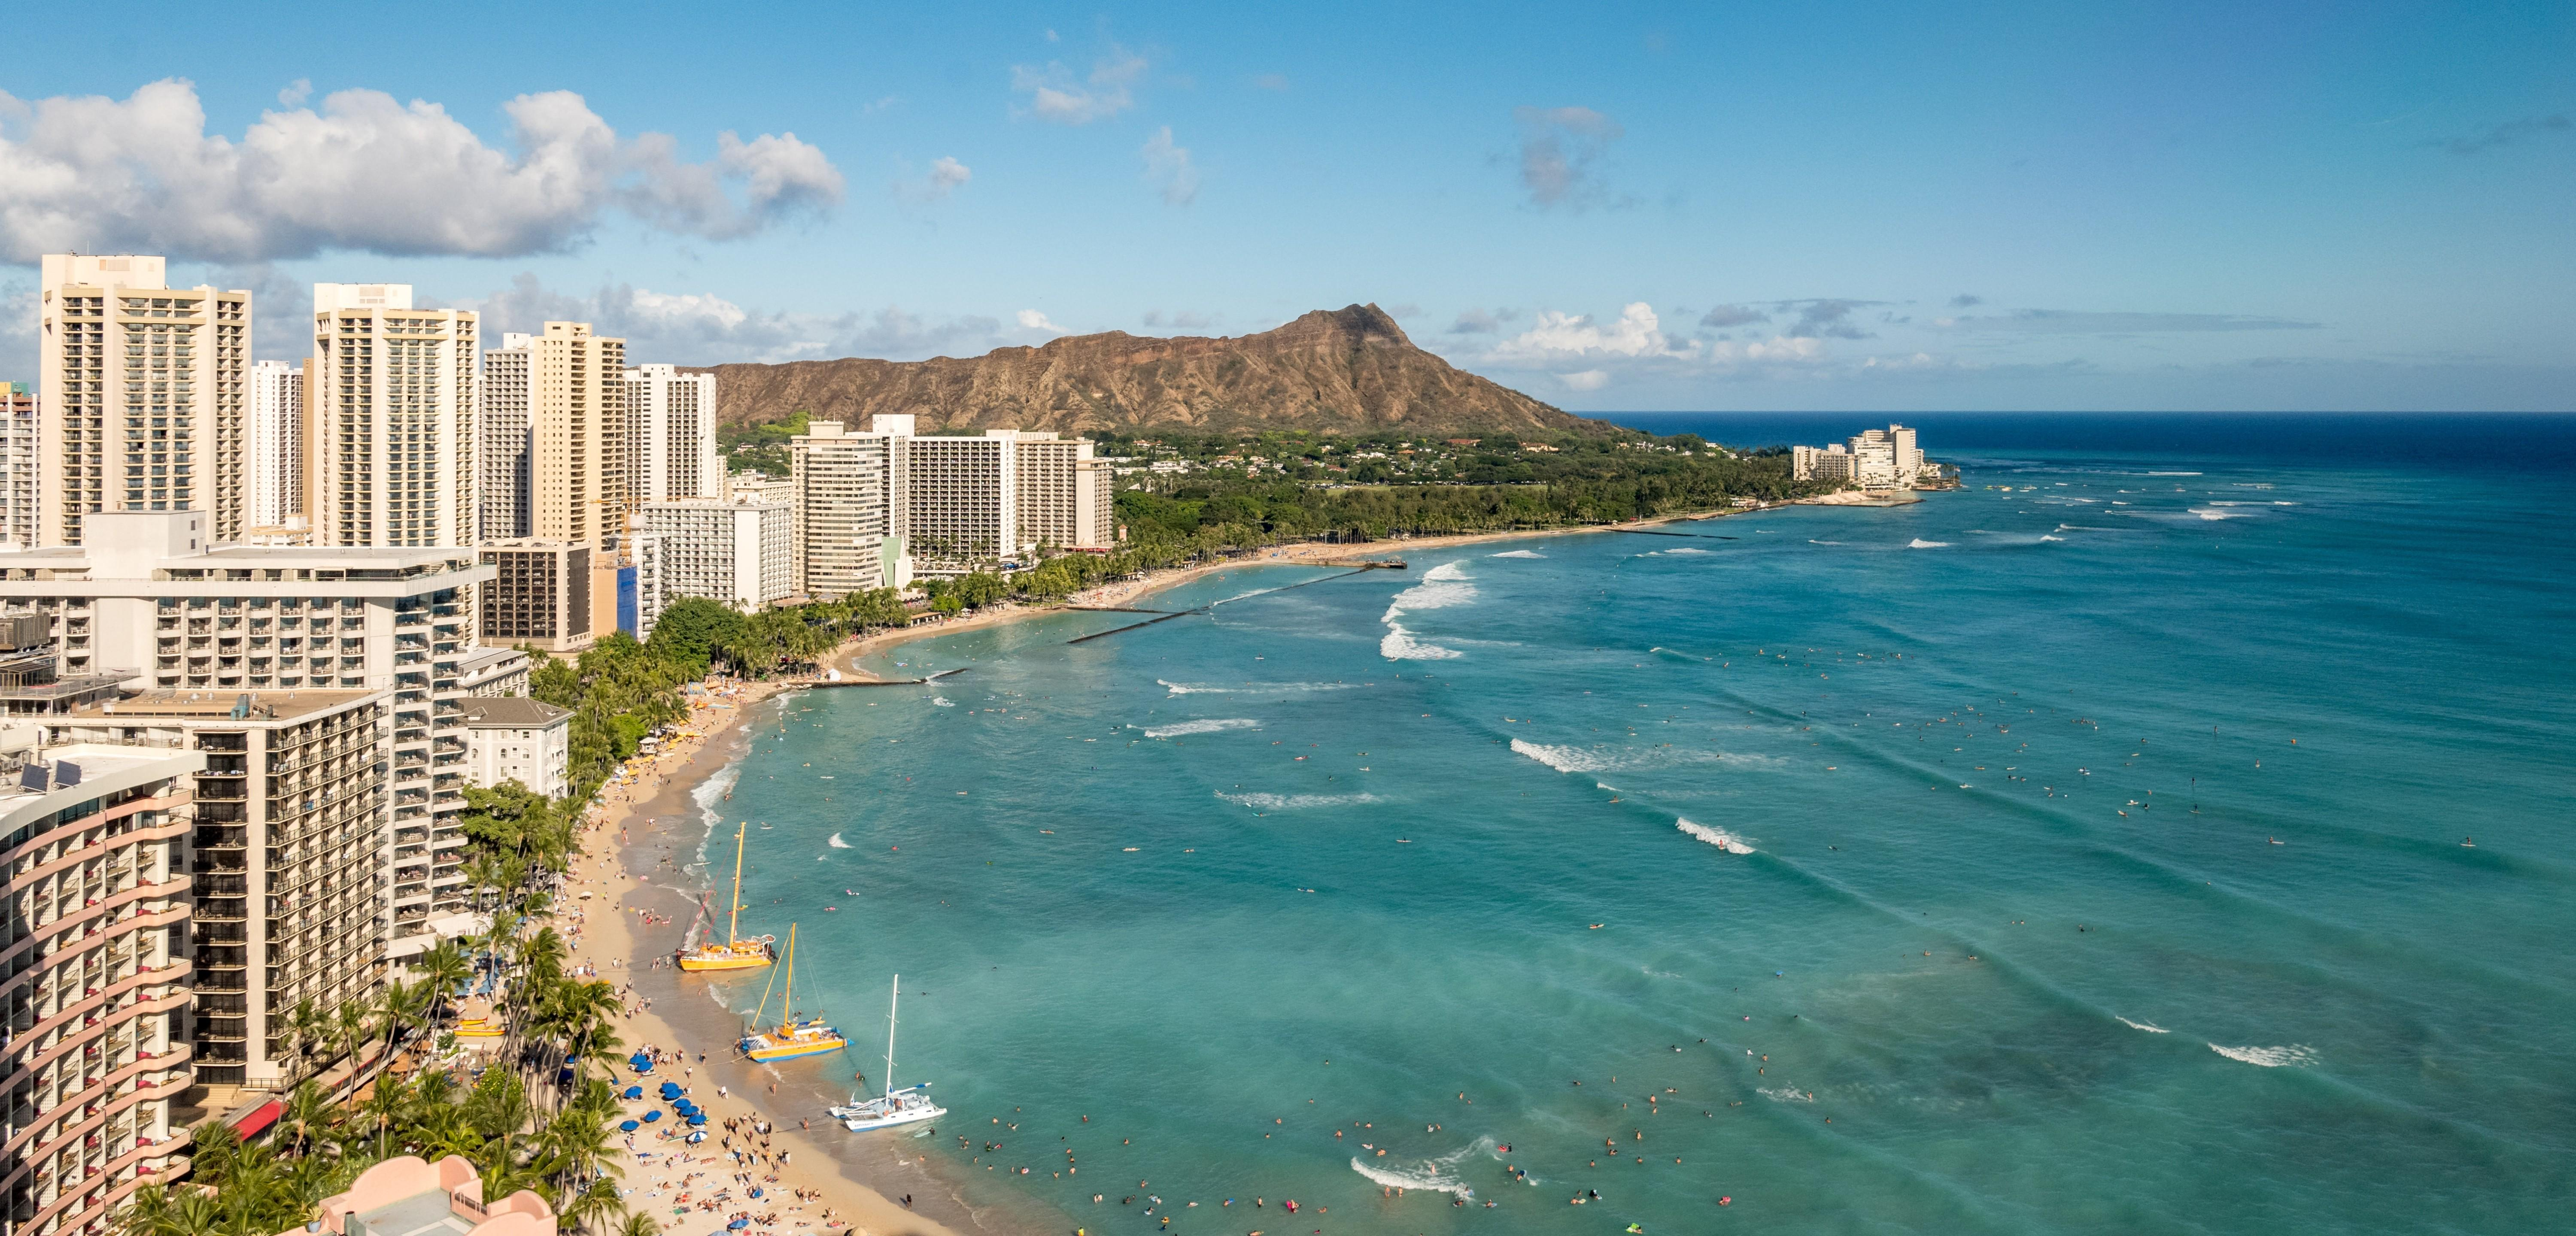

In [32]:
plt_img_base64(image_b64)

In [33]:
from langchain_core.output_parsers import StrOutputParser
from langchain_ollama import ChatOllama

llm = ChatOllama(model='llava:7b', temperature=0)

In [ ]:
chain = prompt_func | llm | StrOutputParser()

In [35]:
rt = chain.invoke({"text" : "Describe a picture in bullet points", 
                   "image" : image_b64 })

TypeError: BaseModel.__init__() takes 1 positional argument but 2 were given